In [47]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [48]:
torch.cuda.is_available()

True

In [49]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [50]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [51]:
max_exec = complete_data.groupby(['model_name', 'dataset']).agg({
    'seed': max
}).reset_index()

max_exec.loc[max_exec.model_name.apply(lambda x: True if 'LITE' in x else False)]

,model_name,dataset,seed
68,LITE,articularywordrecognition,10
69,LITE,atrialfibrillation,10
70,LITE,basicmotions,10
71,LITE,cricket,10
72,LITE,natops,10
73,LITE,racketsports,10
74,LITE,standwalkjump,10
75,LITEIntermediate,articularywordrecognition,10
76,LITEIntermediate,atrialfibrillation,10
77,LITEIntermediate,basicmotions,10


In [52]:
agg_results_data = get_all_results(True)

In [53]:
agg_results_data.model_name.unique()

array(['FullyConvolutionalNetwork1D', 'FullyConvolutionalNetwork1DGAP',
       'FullyConvolutionalNetwork1DIntermediate',
       'FullyConvolutionalNetwork1DIntermediateGAP',
       'FullyConvolutionalNetwork1DLate',
       'FullyConvolutionalNetwork1DLateGAP', 'InceptionTime',
       'InceptionTimeIntermediate', 'InceptionTimeLate', 'LITE',
       'LITEIntermediate', 'LITELate', 'MultiLayerPerceptron'],
      dtype=object)

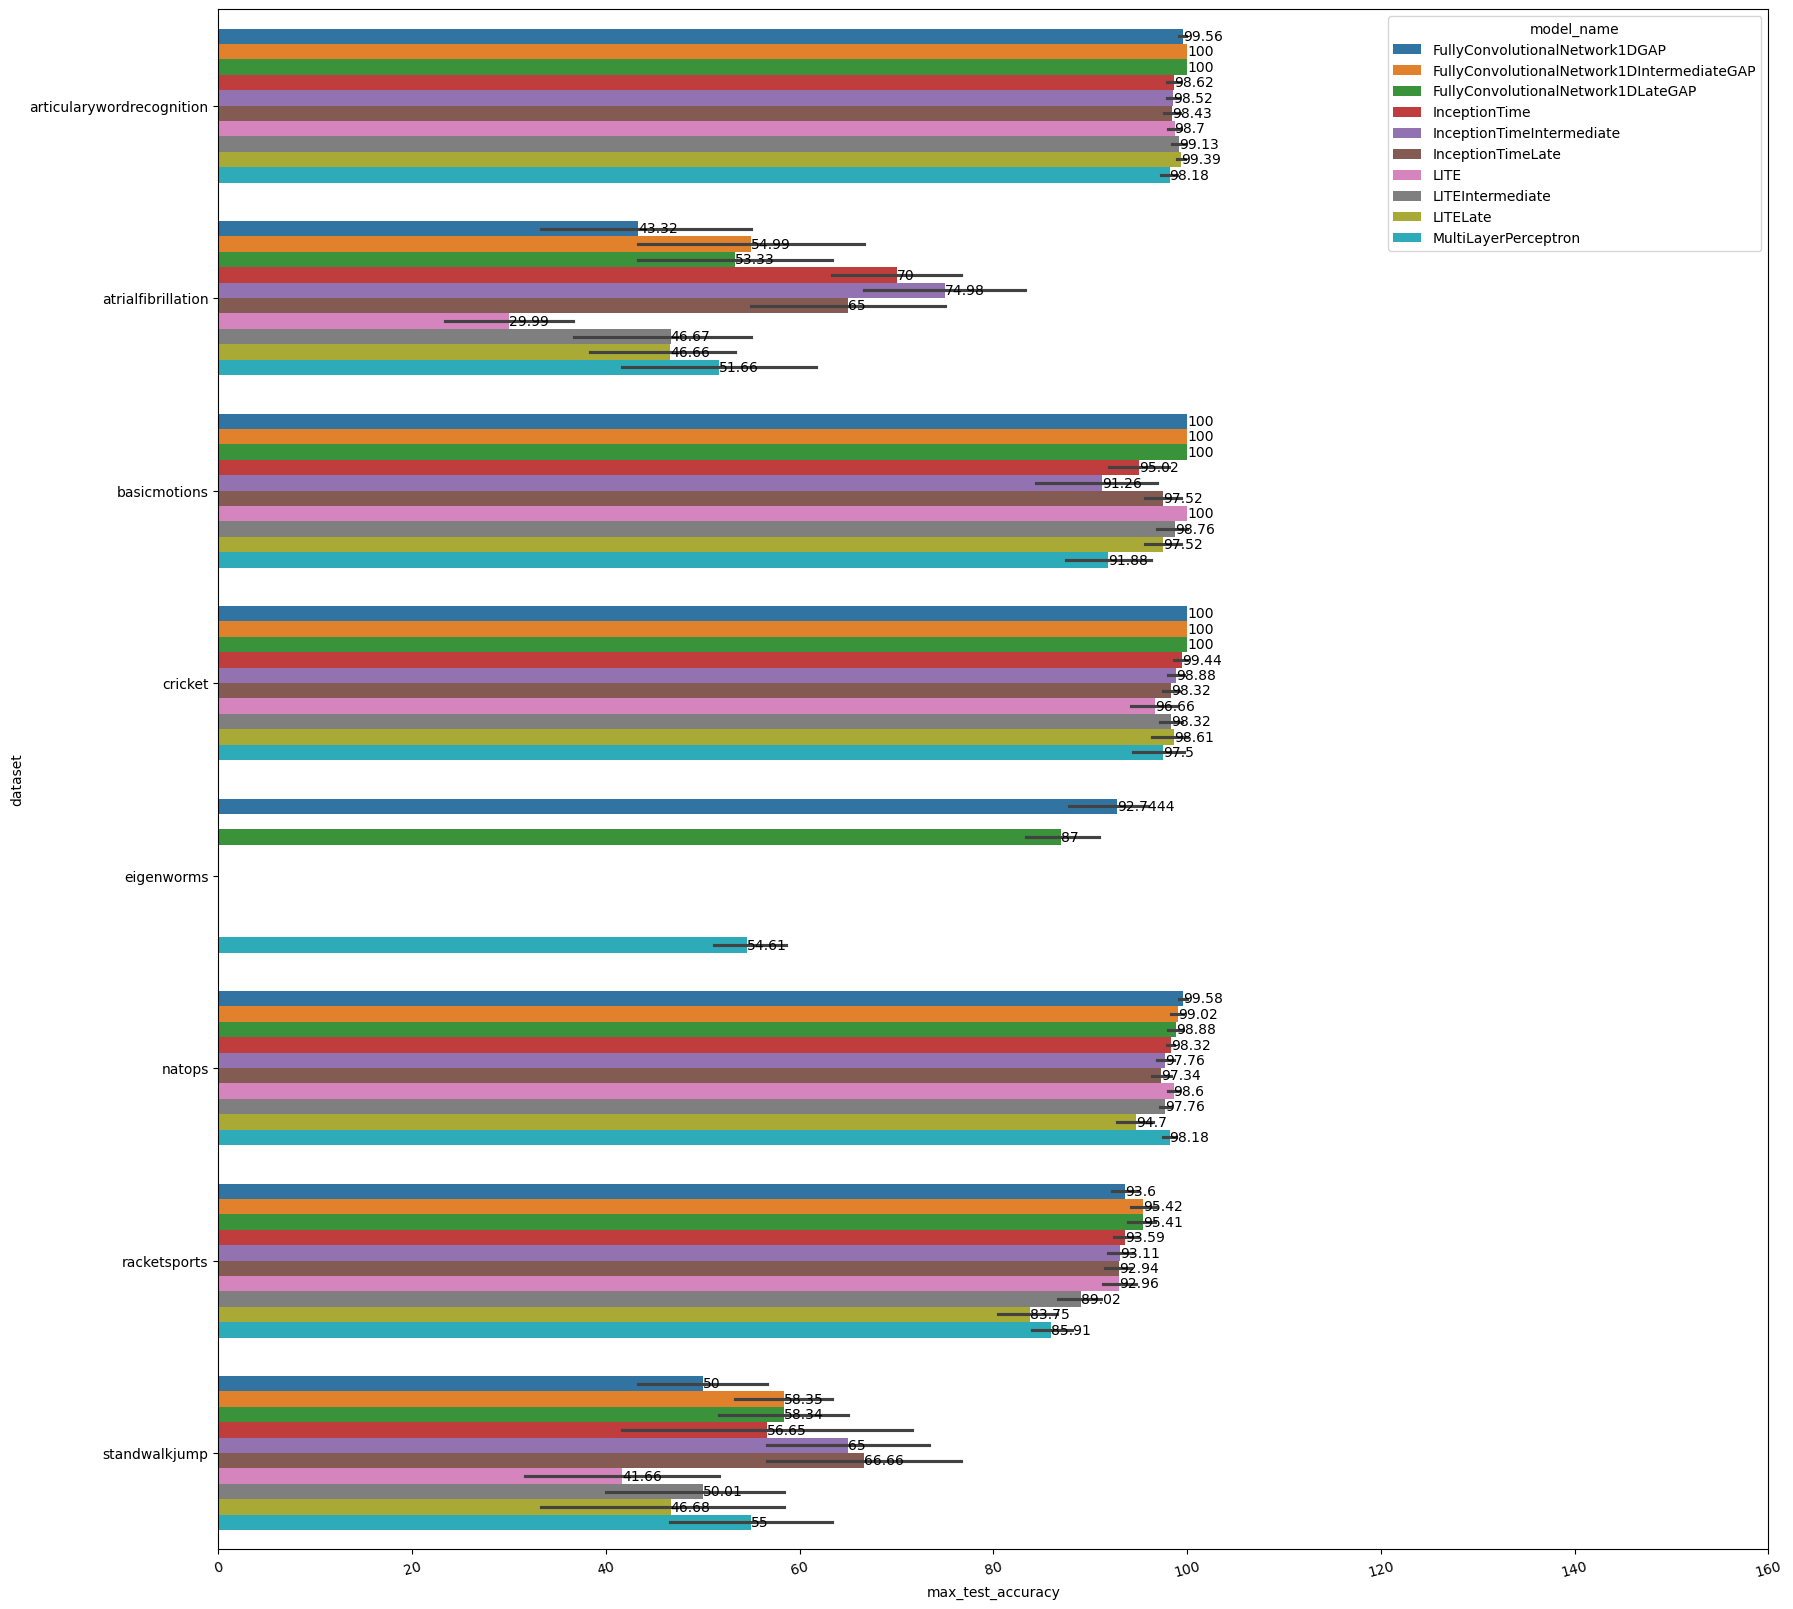

In [54]:
plt.figure(figsize = (20,20))
used_data = complete_data.loc[~complete_data.model_name.isin(['FullyConvolutionalNetwork1DLate','FullyConvolutionalNetwork1DIntermediate', 'FullyConvolutionalNetwork1D'])]

ax = sns.barplot(
    data = used_data, 
    y = 'dataset', 
    x = 100*used_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

/tmp/ipykernel_702785/646229928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['model_name'] = used_data['model_name'].apply(rename_model)


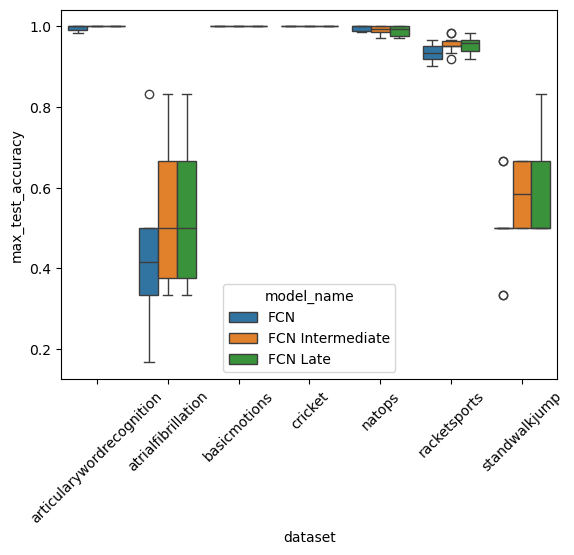

In [55]:
def rename_model(x):
    model_name_map = {
        'FullyConvolutionalNetwork1DLateGAP': 'FCN Late',
        'FullyConvolutionalNetwork1DIntermediateGAP': 'FCN Intermediate',
        'FullyConvolutionalNetwork1DGAP': 'FCN'
    }
    return model_name_map[x] if x in model_name_map.keys() else x

used_data = complete_data.loc[complete_data.model_name.isin(['FullyConvolutionalNetwork1DLateGAP','FullyConvolutionalNetwork1DIntermediateGAP', 'FullyConvolutionalNetwork1DGAP'])]
used_data['model_name'] = used_data['model_name'].apply(rename_model)
used_data = used_data.query("dataset != 'eigenworms'")

sns.boxplot(data=used_data, x = 'dataset', y = 'max_test_accuracy', hue = 'model_name')
plt.xticks(rotation = 45)
plt.show()

/tmp/ipykernel_702785/260923247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['model_name'] = used_data['model_name'].apply(rename_model)


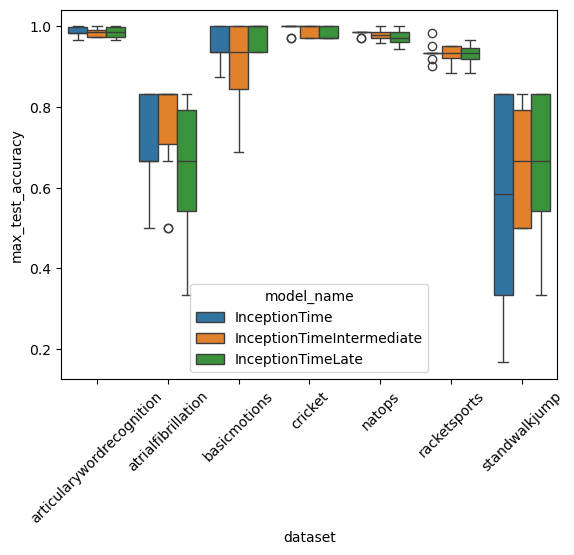

In [56]:
used_data = complete_data.loc[complete_data.model_name.isin(['InceptionTime','InceptionTimeIntermediate', 'InceptionTimeLate'])]
used_data['model_name'] = used_data['model_name'].apply(rename_model)
used_data = used_data.query("dataset != 'eigenworms'")

sns.boxplot(data=used_data, x = 'dataset', y = 'max_test_accuracy', hue = 'model_name')
plt.xticks(rotation = 45)
plt.show()

/tmp/ipykernel_702785/3780849816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['model_name'] = used_data['model_name'].apply(rename_model)


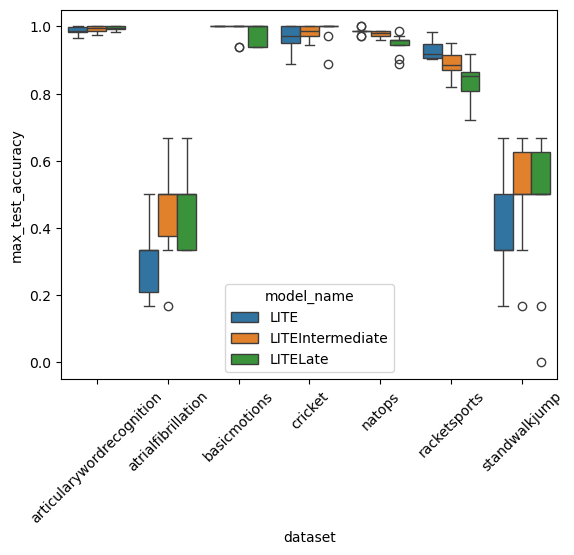

In [57]:
used_data = complete_data.loc[complete_data.model_name.isin(['LITE','LITEIntermediate', 'LITELate'])]
used_data['model_name'] = used_data['model_name'].apply(rename_model)
used_data = used_data.query("dataset != 'eigenworms'")

sns.boxplot(data=used_data, x = 'dataset', y = 'max_test_accuracy', hue = 'model_name')
plt.xticks(rotation = 45)
plt.show()

In [58]:
def read_metrics(path):
    file = open(path, 'rb')
    metrics = pickle.load(file)

    return metrics

metrics = read_metrics('/home/stbastos/experiments/multimodal_time_series_classification/model_checkpoints/FullyConvolutionalNetwork1D_articularywordrecognition_1/metrics.pkl')

not_ensemble_models = [
    'FullyConvolutionalNetwork1DGAP',
    'FullyConvolutionalNetwork1DLateGAP',
    'FullyConvolutionalNetwork1DIntermediateGAP',
    'FullyConvolutionalNetwork1D',
    'FullyConvolutionalNetwork1DLate',
    'FullyConvolutionalNetwork1DIntermediate',
    'MultiLayerPerceptron'
]

model_checkpoints_path = '/home/stbastos/experiments/multimodal_time_series_classification/model_checkpoints'


model_execution_info = []


for execution in os.listdir(model_checkpoints_path):

    
    model_name, dataset_name, execution_number = execution.split('_')
    if dataset_name == 'eigenworms':
        continue

    if model_name in not_ensemble_models:
        seed = execution_number
        model_path = model_checkpoints_path + '/' + execution + '/metrics.pkl'
        metrics = read_metrics(model_path)
        max_test_accuracy = max(metrics['history']['test_accuracy'])

        model_info = {
            'model_name': model_name,
            'dataset_name': dataset_name,
            'execution_number': execution_number,
            'seed': seed,
            'traning_time': metrics['traning_time'],
            'total_epochs': len(metrics['history']['epochs']),
            'test_accuracy': max_test_accuracy,
            'epochs_to_get_maximum': metrics['history']['test_accuracy'].index(max_test_accuracy) + 1
        }

        model_execution_info.append(model_info)

    else:
        for execution_ensemble in os.listdir(model_checkpoints_path + '/' + execution):
            if execution_ensemble == 'metrics.pkl':
                continue
            else:
                seed = execution_ensemble.split('model')[-1]
                model_path = model_checkpoints_path + '/' + execution + '/' + execution_ensemble + '/metrics.pkl'
                metrics = read_metrics(model_path)

                max_test_accuracy = max(metrics['history']['test_accuracy'])

                model_info = {
                    'model_name': model_name,
                    'dataset_name': dataset_name,
                    'execution_number': execution_number,
                    'seed': seed,
                    'traning_time': metrics['traning_time'],
                    'total_epochs': len(metrics['history']['epochs']),
                    'test_accuracy': max_test_accuracy,
                    'epochs_to_get_maximum': metrics['history']['test_accuracy'].index(max_test_accuracy) + 1
                }

                model_execution_info.append(model_info)

model_execution_info = pd.DataFrame(model_execution_info)  
model_execution_info['execution_number'] = pd.to_numeric(model_execution_info['execution_number'])
model_execution_info['seed'] = pd.to_numeric(model_execution_info['seed'])
model_execution_info['time_per_epoch'] = model_execution_info['total_epochs']/model_execution_info['traning_time']
model_execution_info['is_multimodal'] = model_execution_info.model_name.apply(lambda x: 'Mutlimodal' if ('Intermediate' in x ) or ('Late' in x) else 'Not Multimodal')
model_execution_info['is_ensemble'] = model_execution_info.model_name.apply(lambda x: 'Ensemble' if x not in not_ensemble_models else 'Not Ensemble')

In [59]:
agg_model_execution_info = model_execution_info.groupby(['model_name', 'dataset_name', 'execution_number', 'is_multimodal']).agg({
    'traning_time': 'sum',
    'test_accuracy': 'mean',
    'epochs_to_get_maximum': 'mean',
    'time_per_epoch': 'mean',
}).reset_index()

In [60]:
agg_model_execution_info

,model_name,dataset_name,execution_number,is_multimodal,traning_time,test_accuracy,epochs_to_get_maximum,time_per_epoch
0,FullyConvolutionalNetwork1D,articularywordrecognition,1,Not Multimodal,2.277446,1.000000,33.0,2195.441476
1,FullyConvolutionalNetwork1D,articularywordrecognition,2,Not Multimodal,220.451716,0.991304,1176.0,22.680703
2,FullyConvolutionalNetwork1D,articularywordrecognition,3,Not Multimodal,0.389587,1.000000,6.0,12834.106261
3,FullyConvolutionalNetwork1D,articularywordrecognition,4,Not Multimodal,0.261074,1.000000,4.0,19151.653297
4,FullyConvolutionalNetwork1D,articularywordrecognition,5,Not Multimodal,0.261064,1.000000,4.0,19152.405384
...,...,...,...,...,...,...,...,...
905,MultiLayerPerceptron,standwalkjump,6,Not Multimodal,8.519672,0.500000,1.0,586.877026
906,MultiLayerPerceptron,standwalkjump,7,Not Multimodal,8.507372,0.333333,1.0,587.725537
907,MultiLayerPerceptron,standwalkjump,8,Not Multimodal,8.522695,0.500000,3.0,586.668917
908,MultiLayerPerceptron,standwalkjump,9,Not Multimodal,8.554916,0.500000,6.0,584.459281


In [61]:
from visualization.critical_diagram import draw_cd_diagram

In [62]:
critical_diagram_data = complete_data.groupby(['model_name', 'dataset'])['max_test_accuracy'].mean().reset_index().rename({
    'model_name': 'classifier_name',
    'dataset': 'dataset_name',
    'max_test_accuracy': 'accuracy'

}, axis = 1)

In [63]:
used_classifiers = [
    'MultiLayerPerceptron',
    'FullyConvolutionalNetwork1D',
    'FullyConvolutionalNetwork1DIntermediate',
    'FullyConvolutionalNetwork1DLate',
    'InceptionTime',
    'InceptionTimeLate',
    'InceptionTimeIntermediate',
    'LITE',
    'LITEIntermediate',
    'LITELate'
]

In [64]:
used_df = critical_diagram_data.loc[critical_diagram_data.classifier_name.isin(used_classifiers)].query("dataset_name != 'eigenworms'")
# used_df

In [65]:
metrics_df = pd.pivot_table(
    used_df.query("dataset_name != 'eigenworms'"),
    index = 'dataset_name',
    columns = 'classifier_name',
    values = 'accuracy'
)

In [66]:
metrics_df

classifier_name,FullyConvolutionalNetwork1D,FullyConvolutionalNetwork1DIntermediate,FullyConvolutionalNetwork1DLate,InceptionTime,InceptionTimeIntermediate,InceptionTimeLate,LITE,LITEIntermediate,LITELate,MultiLayerPerceptron
dataset_name,,,,,,,,,,
articularywordrecognition,0.995652,1.000000,1.000000,0.986087,0.985217,0.984348,0.986957,0.991304,0.993913,0.981739
atrialfibrillation,0.433333,0.550000,0.533333,0.700000,0.750000,0.650000,0.300000,0.466667,0.466667,0.516667
basicmotions,1.000000,1.000000,1.000000,0.950000,0.912500,0.975000,1.000000,0.987500,0.975000,0.918750
cricket,1.000000,1.000000,1.000000,0.994444,0.988889,0.983333,0.966667,0.983333,0.986111,0.975000
natops,0.995833,0.990278,0.988889,0.983333,0.977778,0.973611,0.986111,0.977778,0.947222,0.981944
racketsports,0.936066,0.954098,0.954098,0.936066,0.931148,0.929508,0.929508,0.890164,0.837705,0.859016
standwalkjump,0.500000,0.583333,0.600000,0.566667,0.650000,0.666667,0.416667,0.500000,0.466667,0.550000


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: LITE Late vs LITE'}, xlabel='LITE Late performance', ylabel='LITE performance'>)

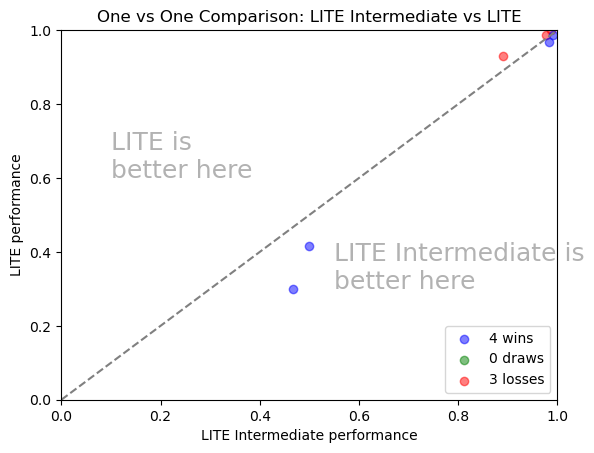

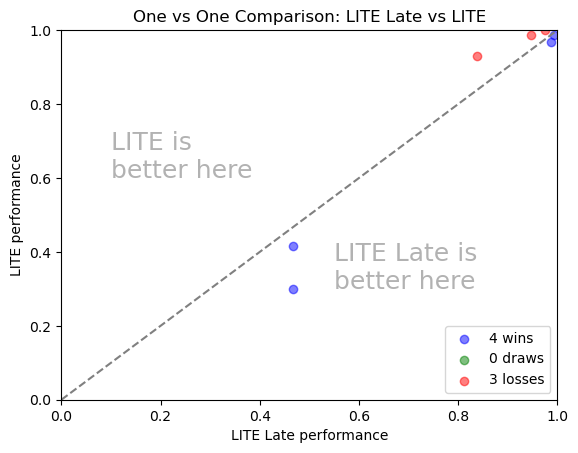

In [67]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['LITEIntermediate'].values,
    metrics_df['LITE'].values,
    'LITE Intermediate', 'LITE'
)

one_vs_one_plot(
    metrics_df['LITELate'].values,
    metrics_df['LITE'].values,
    'LITE Late', 'LITE'
)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: InceptionTime Late vs InceptionTime'}, xlabel='InceptionTime Late performance', ylabel='InceptionTime performance'>)

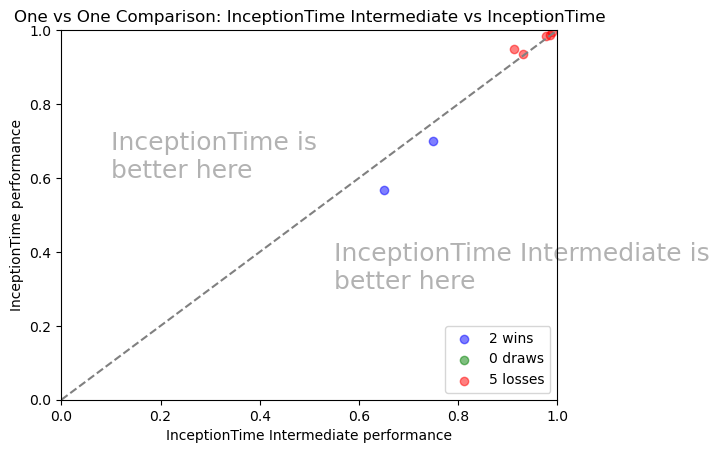

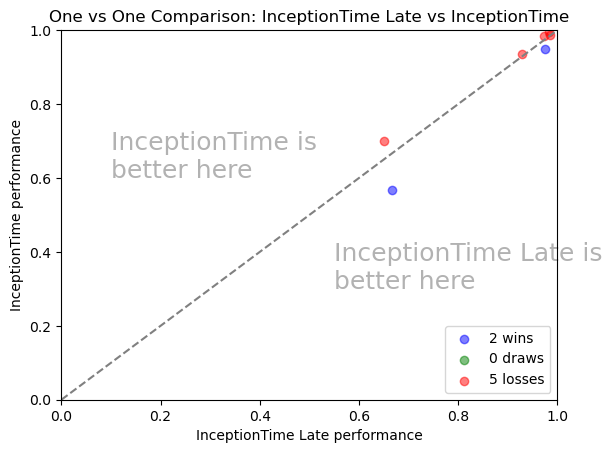

In [68]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['InceptionTimeIntermediate'].values,
    metrics_df['InceptionTime'].values,
    'InceptionTime Intermediate', 'InceptionTime'
)

from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['InceptionTimeLate'].values,
    metrics_df['InceptionTime'].values,
    'InceptionTime Late', 'InceptionTime'
)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: FCN Late vs FCN'}, xlabel='FCN Late performance', ylabel='FCN performance'>)

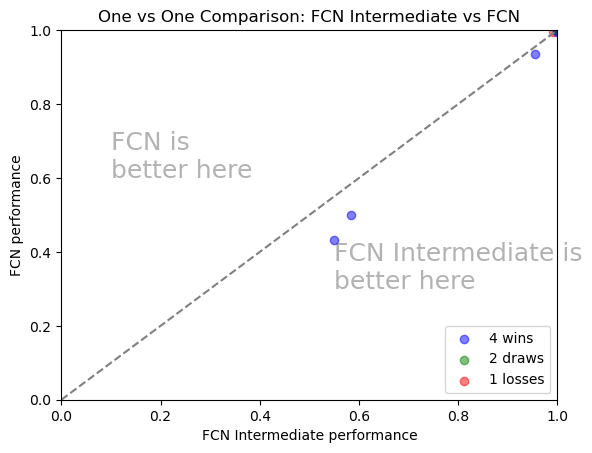

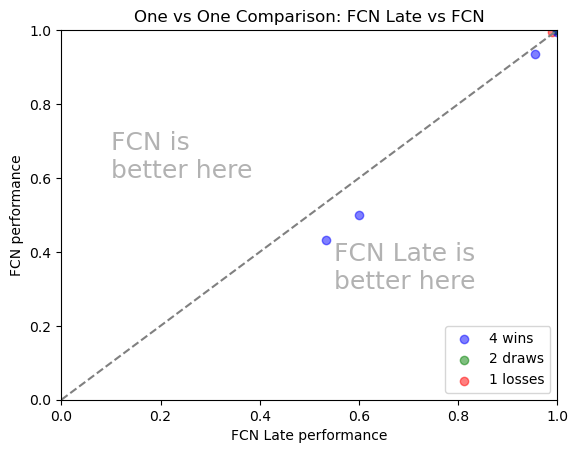

In [69]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['FullyConvolutionalNetwork1DIntermediate'].values,
    metrics_df['FullyConvolutionalNetwork1D'].values,
    'FCN Intermediate', 'FCN'
)

from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['FullyConvolutionalNetwork1DLate'].values,
    metrics_df['FullyConvolutionalNetwork1D'].values,
    'FCN Late', 'FCN'
)


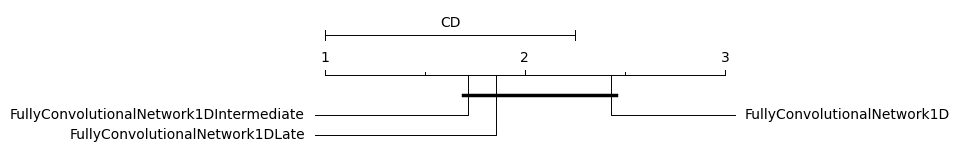

In [70]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[:, ['FullyConvolutionalNetwork1D', 'FullyConvolutionalNetwork1DIntermediate', 'FullyConvolutionalNetwork1DLate']],
    test='nemenyi',
    alpha=0.05
)

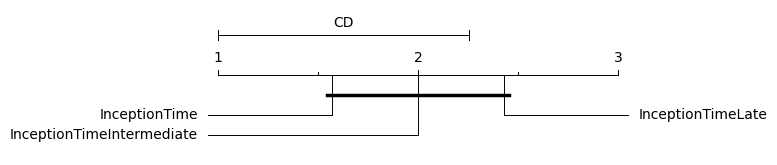

In [71]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[:, ['InceptionTime', 'InceptionTimeIntermediate', 'InceptionTimeLate']],
    test='nemenyi',
    alpha=0.05
)

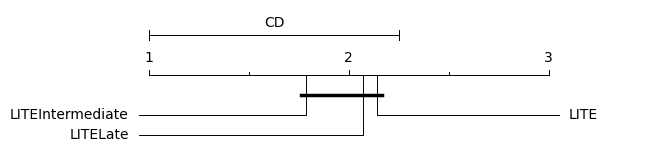

In [72]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[: , ['LITE', 'LITEIntermediate', 'LITELate']],
    test='nemenyi',
    alpha=0.05
)

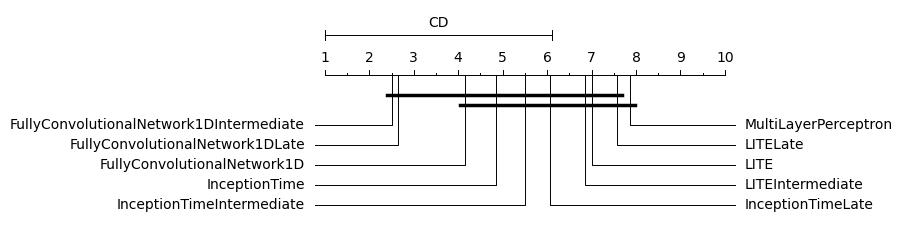

In [73]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df,
    test='nemenyi',
    alpha=0.05
)

['FullyConvolutionalNetwork1D' 'FullyConvolutionalNetwork1DIntermediate'
 'FullyConvolutionalNetwork1DLate' 'InceptionTime'
 'InceptionTimeIntermediate' 'InceptionTimeLate' 'LITE' 'LITEIntermediate'
 'LITELate' 'MultiLayerPerceptron']
FullyConvolutionalNetwork1D                1.0
FullyConvolutionalNetwork1DIntermediate    0.0
FullyConvolutionalNetwork1DLate            0.0
InceptionTime                              0.0
InceptionTimeIntermediate                  1.0
InceptionTimeLate                          1.0
LITE                                       0.0
LITEIntermediate                           0.0
LITELate                                   0.0
MultiLayerPerceptron                       0.0
dtype: float64
MultiLayerPerceptron                       7.857143
LITELate                                   7.571429
LITE                                       7.000000
LITEIntermediate                           6.857143
InceptionTimeLate                          6.071429
InceptionTimeInterme

/home/stbastos/yes/envs/pytorch_enviroment/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/home/stbastos/yes/envs/pytorch_enviroment/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


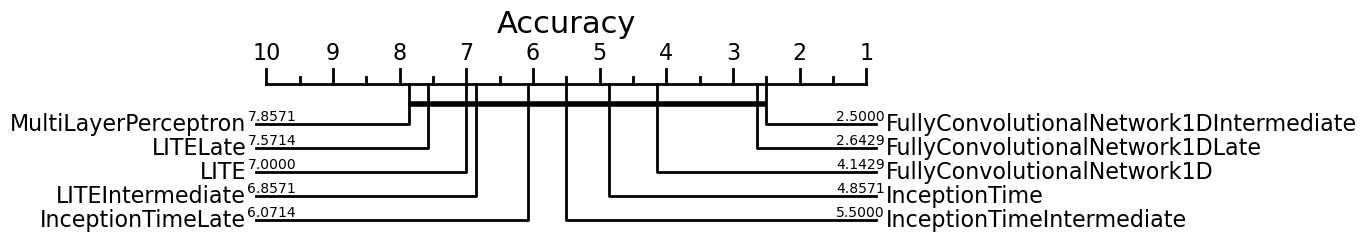

<Figure size 640x480 with 0 Axes>

In [74]:
result = draw_cd_diagram(
    # df_perf=critical_diagram_data.query("dataset_name != 'eigenworms'"), 
    df_perf=used_df, 
    # df_perf=critical_diagram_data.loc[critical_diagram_data.classifier_name.apply(lambda x: True if 'Fully' in x else False)], 
    title='Accuracy', 
    labels=True, 
    alpha=0.05
)

# plt.imshow('/home/stbastos/experiments/multimodal_time_series_classification/cd-diagram.png')


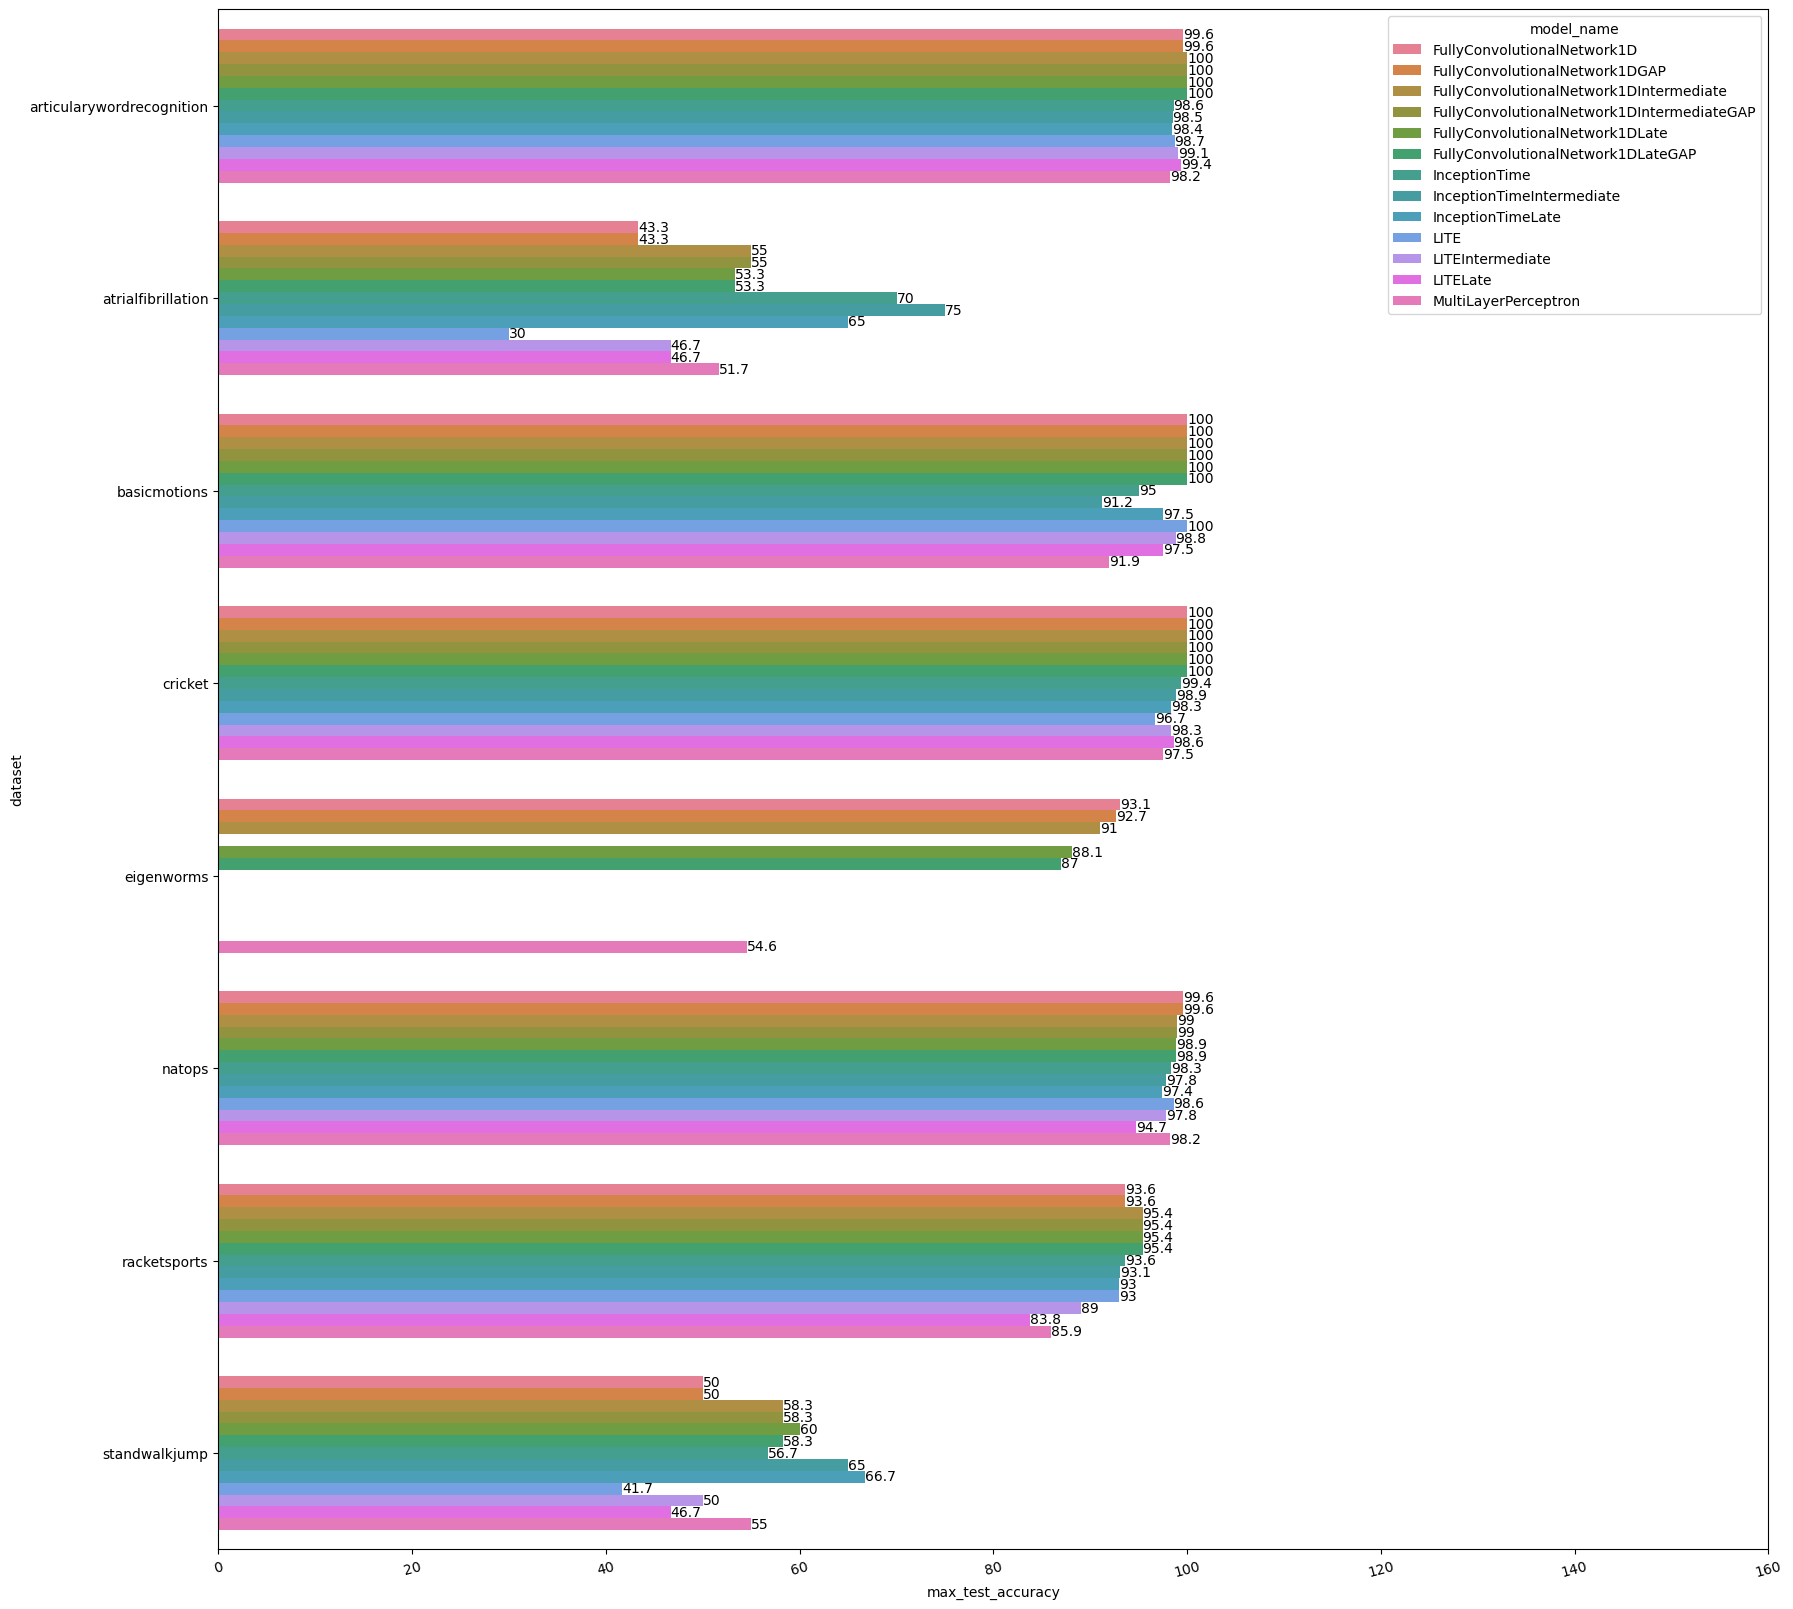

In [75]:
plt.figure(figsize = (20,20))
ax = sns.barplot(
    data = agg_results_data, #.query("model_name != 'InceptionTime'"), 
    y = 'dataset', 
    x = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()